In [1]:
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls = pd.ExcelFile('Browser_Revenue.xlsx')
Chrome = pd.read_excel(xls, 'Chrome')
Safari= pd.read_excel(xls, 'Safari')
Internet_Explorer = pd.read_excel(xls, 'Internet Explorer')

### We pick only Chrome, Safari and Internet Explorer since the other browsers have little to no revenue 

In [3]:
#Remove the dates for ease
Chrome = Chrome['Revenue']
Safari= Safari['Revenue']
Internet_Explorer = Internet_Explorer['Revenue']

In [4]:
#convert datasets into arrays
Chrome = Chrome.values
Safari= Safari.values
Internet_Explorer = Internet_Explorer.values

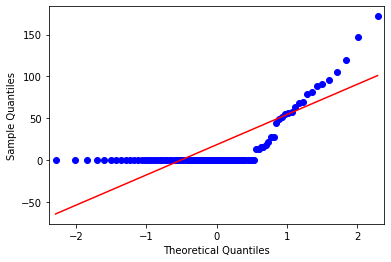

In [5]:
#plot both datasets using qqplot to check for normality
qqplot(Chrome, line='s')
pyplot.show()

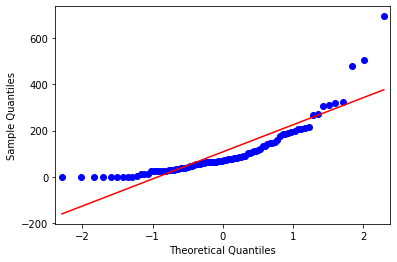

In [6]:
qqplot(Safari, line='s')
pyplot.show()

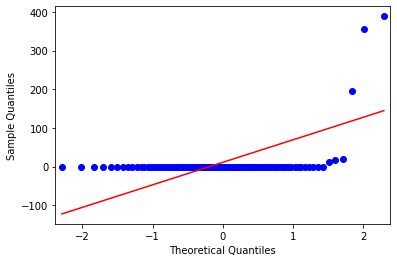

In [7]:
qqplot(Internet_Explorer, line='s')
pyplot.show()

### The datasets don't look normal since they fall off the qq plot

In [8]:
# normality test with Shapiro
stat, p = shapiro(Chrome)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.582, p=0.000
Sample does not look Gaussian (reject H0)


In [9]:
stat, p = shapiro(Safari)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.764, p=0.000
Sample does not look Gaussian (reject H0)


In [10]:
stat, p = shapiro(Internet_Explorer)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.185, p=0.000
Sample does not look Gaussian (reject H0)


### Since not all datasets are normaly distributed non - parametric tests should be used.

In [11]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

In [12]:
tat, p = ranksums(Chrome,Safari)
# interpret
alpha = 0.05
if p > alpha:
	print('The difference between the two datasets is not significant (fail to reject H0)')
else:
	print('The difference between the two datasets is significant (reject H0)')

The difference between the two datasets is significant (reject H0)


In [13]:
stat, p = ranksums(Chrome,Internet_Explorer)
# interpret
alpha = 0.05
if p > alpha:
	print('The difference between the two datasets is not significant (fail to reject H0)')
else:
	print('The difference between the two datasets is significant (reject H0)')

The difference between the two datasets is significant (reject H0)


In [14]:
stat, p = ranksums(Safari,Internet_Explorer)
# interpret
alpha = 0.05
if p > alpha:
	print('The difference between the two datasets is not significant (fail to reject H0)')
else:
	print('The difference between the two datasets is significant (reject H0)')

The difference between the two datasets is significant (reject H0)


### We conclude that the difference between the datasets is significant